In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tweepy 
from tweepy import OAuthHandler

In [2]:
def TwitterClient(): 
    # keys and tokens from the Twitter Dev Console 
    api_key = "xQGrEytN0KSsEERUlbA3Mwjdv"
    api_secret = "N7ModRAyQqtFkB4jvI1o0nCooyfSGfZZUAaIfHTQp3iiUGutKi"
    access = "3118781631-GnQENiXAMouhIuhas2ol14A4b9zyChTR927WZmW"
    access_secret = "frEmYjSFnETQka3sOtTb2x6oCOAkFHDmSivcgrqULytRL"

    # attempt authentication 
    try: 
        # create OAuthHandler object 
        auth = OAuthHandler(api_key, api_secret) 
        # set access token and secret 
        auth.set_access_token(access, access_secret) 
        # create tweepy API object to fetch tweets 
        api = tweepy.API(auth) 
    except: 
        print("Error: Authentication Failed") 

    return api #now we can make request to twitter using this api

In [182]:
api = TwitterClient()

#get tweets from a user and add the tweets to a dataframe
def get_tweets(user_name):
    tweets = []
    for tweet in tweepy.Cursor(api.user_timeline, id=user_name).items():
        tweets.append(tweet)
    df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
    return df

C:\Users\hasan\anaconda3\envs\DataScience\lib\site-packages\tweepy\auth.py:120: DeprecationWarning: OAuthHandler is deprecated; use OAuth1UserHandler instead.
  warnings.warn(


In [ ]:
jeff_tweets = get_tweets('JeffBezos')
jeff_tweets.columns = ['Jeff Bezos']
elon_tweets = get_tweets('elonmusk')
elon_tweets.columns = ['Elon Musk']
shaq_tweets = get_tweets('SHAQ')
shaq_tweets.columns = ["Shaquille O'Neal"]
snoop_tweets = get_tweets('SnoopDogg')
snoop_tweets.columns = ["Snoop Dogg"]

In [ ]:
#combine all the dataframes into one
df = pd.concat([jeff_tweets, elon_tweets, shaq_tweets, snoop_tweets], axis=1)

In [108]:
import re
from nltk.corpus import stopwords
# Remove punctuation
def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', ' ', text)

# convert to lower case
def lower_case(text):
    return text.lower()

# remove stop words
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    stop_words.update(["https", "co", "http", "'", "rt"])
    word_tokens = text.split()
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return filtered_sentence


# call the functions for all the snoop_tweets
snoop_tweets["cleaned_tweets"] = snoop_tweets["Snoop Dogg"].apply(remove_punctuation)
snoop_tweets["cleaned_tweets"] = snoop_tweets["cleaned_tweets"].apply(lower_case)
snoop_tweets["cleaned_tweets"] = snoop_tweets["cleaned_tweets"].apply(remove_stop_words)

# call the functions for all the shaq_tweets
shaq_tweets["cleaned_tweets"] = shaq_tweets["Shaquille O'Neal"].apply(remove_punctuation)
shaq_tweets["cleaned_tweets"] = shaq_tweets["cleaned_tweets"].apply(lower_case)
shaq_tweets["cleaned_tweets"] = shaq_tweets["cleaned_tweets"].apply(remove_stop_words)

# call the functions for all the jeff_tweets
jeff_tweets["cleaned_tweets"] = jeff_tweets["Jeff Bezos"].apply(remove_punctuation)
jeff_tweets["cleaned_tweets"] = jeff_tweets["cleaned_tweets"].apply(lower_case)
jeff_tweets["cleaned_tweets"] = jeff_tweets["cleaned_tweets"].apply(remove_stop_words)


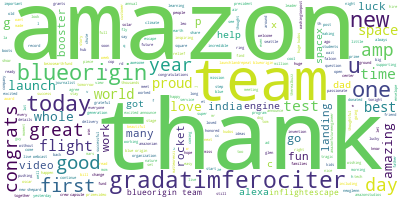

In [116]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different cleaned tweets of jeff bezos into one big string
jeff_string = " ".join([str(word) for item in jeff_tweets["cleaned_tweets"] for word in item])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(jeff_string)

# Visualize the word cloud
wordcloud.to_image()

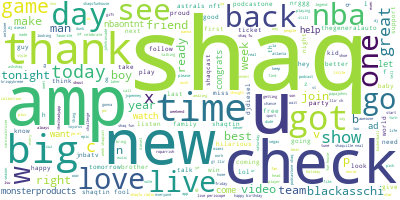

In [115]:
shaq_string = " ".join([str(word) for item in shaq_tweets["cleaned_tweets"] for word in item])
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(shaq_string)
wordcloud.to_image()

In [117]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_jeff = list(sent_to_words(jeff_tweets["cleaned_tweets"]))
data_shaq = list(sent_to_words(shaq_tweets["cleaned_tweets"]))

In [118]:
import gensim.corpora as corpora

# Create Dictionary
id2word_jeff = corpora.Dictionary(data_jeff)

# Create Corpus
texts = data_jeff

# Term Document Frequency
corpus_jeff = [id2word_jeff.doc2bow(text) for text in texts]

# View
print(corpus_jeff[:1][0][:30])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1)]


In [119]:
id2word_shaq = corpora.Dictionary(data_shaq)
texts = data_shaq
corpus_shaq = [id2word_shaq.doc2bow(text) for text in texts]
print(corpus_shaq[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [121]:
from pprint import pprint

# number of topics
num_topics = 4
# Build LDA model
lda_model_jeff = gensim.models.LdaMulticore(corpus=corpus_jeff,
                                       id2word=id2word_jeff,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_jeff.print_topics())
doc_lda = lda_model_jeff[corpus_jeff]

[(0,
  '0.006*"amazon" + 0.005*"new" + 0.005*"day" + 0.005*"blueorigin" + '
  '0.004*"shepard" + 0.004*"amp" + 0.003*"story" + 0.003*"et" + 0.003*"mike" + '
  '0.003*"webcast"'),
 (1,
  '0.008*"one" + 0.008*"team" + 0.007*"amazon" + 0.006*"blueorigin" + '
  '0.005*"us" + 0.005*"first" + 0.005*"good" + 0.004*"thank" + 0.004*"world" + '
  '0.004*"new"'),
 (2,
  '0.011*"blueorigin" + 0.011*"today" + 0.010*"amazon" + 0.006*"thank" + '
  '0.006*"great" + 0.005*"congrats" + 0.005*"flight" + 0.005*"test" + '
  '0.004*"booster" + 0.004*"space"'),
 (3,
  '0.011*"team" + 0.008*"new" + 0.006*"blueorigin" + 0.006*"thanks" + '
  '0.005*"best" + 0.005*"congrats" + 0.005*"alexa" + 0.004*"launch" + '
  '0.004*"spacex" + 0.004*"super"')]


In [122]:
lda_model_shaq = gensim.models.LdaMulticore(corpus=corpus_shaq,
                                        id2word=id2word_shaq,
                                        num_topics=num_topics)
pprint(lda_model_shaq.print_topics())
doc_lda = lda_model_shaq[corpus_shaq]

[(0,
  '0.010*"new" + 0.008*"shaq" + 0.006*"check" + 0.006*"amp" + 0.004*"week" + '
  '0.004*"back" + 0.004*"nba" + 0.004*"astrals" + 0.004*"nft" + '
  '0.004*"shaqcast"'),
 (1,
  '0.019*"shaq" + 0.008*"amp" + 0.007*"live" + 0.004*"big" + 0.004*"thanks" + '
  '0.004*"got" + 0.004*"know" + 0.003*"check" + 0.003*"win" + 0.003*"man"'),
 (2,
  '0.018*"shaq" + 0.007*"big" + 0.005*"get" + 0.004*"time" + 0.004*"love" + '
  '0.004*"game" + 0.003*"amp" + 0.003*"shaqtin" + 0.003*"tonight" + '
  '0.003*"nba"'),
 (3,
  '0.018*"shaq" + 0.010*"get" + 0.004*"amp" + 0.004*"new" + 0.004*"miss" + '
  '0.003*"today" + 0.003*"go" + 0.003*"week" + 0.003*"podcastone" + '
  '0.003*"time"')]


In [123]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model_jeff, corpus_jeff, id2word_jeff)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\hasan\anaconda3\envs\DataScience\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.097403  0.030969       1        1  29.054539
3      0.076819  0.050243       2        1  25.353297
0      0.010359 -0.095398       3        1  23.231966
1      0.010225  0.014186       4        1  22.360198, topic_info=        Term       Freq      Total Category  logprob  loglift
30      team  18.000000  18.000000  Default  30.0000  30.0000
265    today  15.000000  15.000000  Default  29.0000  29.0000
234    alexa   4.000000   4.000000  Default  28.0000  28.0000
57    thanks   8.000000   8.000000  Default  27.0000  27.0000
235      new  14.000000  14.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
133    great   1.627128   9.529726   Topic4  -6.1005  -0.2697
699      air   1.456166   5.004702   Topic4  -6.2115   0.2633
906     blue   1.450253   6.132768   Topic4  -6.2156   0.0560
232  welcome   1.368415   3.679780   Topic4  -6.2736   0.5087
517      get   1.375714   5.549329   Topic4  -6.2683   0.1032

[282 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
318       4  0.548381  aboard
171       1  0.403776     aid
171       4  0.403776     aid
699       1  0.399624     air
699       2  0.199812     air
...     ...       ...     ...
249       3  0.324636    year
249       4  0.324636    year
917       3  0.543459   young
800       4  0.819775   youth
757       2  0.804868      ze

[381 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [126]:
import gensim.downloader as api
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [180]:
from gensim import corpora, models, similarities
from collections import defaultdict

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

documents = [shaq_string, jeff_string]
texts = [[word.lower() for word in document.split()
          if word.lower() not in stop_words]
         for document in documents]

frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
texts = [[token for token in text if frequency[token] > 1]
         for text in texts]
dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

doc = "jordan"
vec_bow = dictionary.doc2bow(doc.lower().split())

# convert the query to LSI space
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])

# perform a similarity query against the corpus
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])

print(sims)

[(0, 0.90712774), (1, 0.0)]


In [184]:
for follower in api.followers("elonmusk"):
    print(follower.screen_name)

AttributeError: 'API' object has no attribute 'followers'